In [1015]:
import pandas as pd
import os 
import spacy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ftfy
import re

# USA

In [1016]:
us = pd.read_csv('Dataset_US.csv')

In [1017]:
# Limitar a dos decimales en múltiples columnas
us[['min_salary', 'max_salary', 'avg_salary']] = us[['min_salary', 'max_salary', 'avg_salary']].round(2)


In [1018]:
us['company_score'] = us['company_score'].round(1)

In [1019]:
state_abbreviations = {
    "Minnesota": "MN",
    "Utah": "UT",
    "Georgia": "GA",
    "Tennessee": "TN",
    "Indiana": "IN",
    "Arizona": "AZ",
    "Alabama": "AL",
    "New York State": "NY",
    "Massachusetts": "MA",
    "Colorado": "CO",
    "Florida": "FL",
    "California": "CA",
    "Oregon": "OR",
    "Maryland": "MD",
    "Texas": "TX",
    "Virginia": "VA",
    "Pennsylvania": "PA",
    "New Jersey": "NJ",
    "North Carolina": "NC",
    "Washington State": "WA",
    "United States" : "Remote", 
    "Minneapolis-Saint Paul" : "MN", 
    "Los Angeles, CA" : "CA", 
    "Nassau, NY" : "NY",
    "Township of Hamilton" : "NJ",
    "Whitehall Township" : "PA", 
    "Redstone Arsenal" : "AL"
}


In [1020]:
# Reemplazar los nombres de los estados por sus abreviaturas
us['state'] = us['state'].replace(state_abbreviations)


In [1021]:
us['company'] = us['company'].replace('<Intent>', 'Intent')

In [1022]:
us['company_score'] = us['company_score'].replace(-1, 1)

In [1023]:

city_replacements = {
    "United States": "Unspecified",
    "Unspecified": "Unspecified",
    "Kennedy Sp Ct": "Kennedy Space Center",
    "Patrick AFB": "Patrick Air Force Base",
    "Stennis Space Center": "Stennis Space Center",
    "Point Mugu NAWC": "Point Mugu",
    "Redstone Arsenal": "Huntsville",
    "Offutt AFB": "Offutt Air Force Base",
    "Eglin AFB": "Eglin Air Force Base",
    "Hill AFB" : "Hill Air Force Base",
    "Edwards AFB" : "Edwards Air Force Base",
    "Offutt A F B" : "Offutt Air Force Base",
    "Aberdeen Proving Ground": "Aberdeen",
    "Kennedy Space Center": "Kennedy Space Center",
    "Phila": "Philadelphia",
}


In [1024]:
us['city'] = us['city'].replace(city_replacements)

In [1025]:

us['position'] = us['position'].str.replace(r'\(.*?\)', '', regex=True)


us['position'] = us['position'].str.strip()


In [1026]:

us['position'] = us['position'].str.replace('â€“', '', regex=False)


us['position'] = us['position'].str.strip()


In [1027]:
# Eliminar números, símbolos de moneda y guiones de la columna 'position'
us['position'] = us['position'].str.replace(r'\$\d+/?\d*|\d+/?\d*|–|-', '', regex=True)

# Eliminar espacios en blanco sobrantes después de eliminar los números
us['position'] = us['position'].str.strip()


In [1028]:
us['position'] = us['position'].str.replace('+ years of experience', '', regex=False)

us['position'] = us['position'].str.replace('hr  hr  ', '', regex=False)

us['position'] = us['position'].str.strip()

In [1029]:
us.sample(20)


,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
408,Navrit Creation,3.6,Software Engineer,"Lexington, SC",Lexington,SC,software engineer,junior,78000.00,131000.00,104500.00,NaN,NaN,NaN,NaN,NaN,NaN
1650,Doubleverify,3.2,Sr. Data Analyst,"New York, NY",New York,NY,data analyst,senior,58000.00,108000.00,83000.00,Senior Data Analyst - Engineering Location:...,Internet,Information Technology,['DV provides media transparency and accountab...,[],[]
792,Systems Technology & Research Inc.,3.9,"Software Engineer Iii, Machine Learning (Recom...","Mountain View, CA",Mountain View,CA,machine learning engineer,senior,104106.76,153335.87,128717.26,NaN,NaN,NaN,NaN,NaN,NaN
1396,Credit Sesame,4.1,Lead Data Engineer,"Mountain View, CA",Mountain View,CA,data engineer,senior,190000.00,220000.00,205000.00,Credit Sesame is bringing cash and credit toge...,Internet,Information Technology,"[""You'll... be the point person and data expe...",[],"[""You're a great fit for our team because... ..."
161,Mailprotector,4.6,Software Engineer,Remote,Remote,Remote,software engineer,junior,104000.00,104000.00,104000.00,NaN,NaN,NaN,NaN,NaN,NaN
76,Dōterra International,4.0,Software Engineer Ii,Utah,Utah,UT,software engineer,junior,85000.00,114000.00,99500.00,NaN,NaN,NaN,NaN,NaN,NaN
1018,Confidential,3.8,Machine Learning Sales Engineer,United States,Unspecified,Remote,machine learning engineer,junior,103930.61,145632.17,124723.92,Machine Learning Sales Engineer Location: F...,No Especifica,No Especifica,['Deep business knowledge in one target indust...,[],['Requirements: Master’s degree in a technica...
248,Cliftonlarsonallen,4.8,Devops Engineer,"Minneapolis, MN",Minneapolis,MN,devops engineer,junior,94000.00,156000.00,125000.00,NaN,NaN,NaN,NaN,NaN,NaN
1362,Western Digital,3.5,Staff Data Scientist,"San Jose, CA",San Jose,CA,data scientist,junior,132000.00,211000.00,171500.00,Western Digital The next big thing in data i...,Computer Hardware & Software,Information Technology,['REQUIRED SKILLS & CHARACTERISTICS: Master’s...,[],['Interact with business users to understand t...
562,"Hawaiian Airlines, Inc.",3.2,Staff Software Engineer - Documents,United States,Unspecified,Remote,software engineer,junior,80000.00,123000.00,101500.00,NaN,NaN,NaN,NaN,NaN,NaN


In [1030]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1680 non-null   object 
 1   company_score     1680 non-null   float64
 2   job_title         1680 non-null   object 
 3   location          1680 non-null   object 
 4   city              1680 non-null   object 
 5   state             1680 non-null   object 
 6   position          1680 non-null   object 
 7   seniority         1680 non-null   object 
 8   min_salary        1680 non-null   float64
 9   max_salary        1680 non-null   float64
 10  avg_salary        1680 non-null   float64
 11  job_info          810 non-null    object 
 12  industry          810 non-null    object 
 13  sector            810 non-null    object 
 14  skills            810 non-null    object 
 15  responsibilities  810 non-null    object 
 16  requirements      810 non-null    object 


In [1031]:

def plot_liers(df, column, title='Without Outliers Visualization'):
    """
    Visualiza valores atípicos para una columna numérica utilizando un scatterplot.

    Parameters:
    df (DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna numérica para analizar.
    title (str): El título del gráfico.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], label='Data')
    # Scatterplot para valores atípicos
    sns.scatterplot(x=df.index, y=df[column], color='blue', alpha=0.6, label='Data Points')
    
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)
    plt.legend()
    plt.show()

def detect_and_plot_outliers(df, column, threshold=4):
    """
    Detecta y visualiza valores atípicos en una columna numérica.

    Parameters:
    df (DataFrame): El DataFrame que contiene los datos.
    column (str): El nombre de la columna numérica para analizar.
    threshold (float): El umbral para la detección de valores atípicos.
    """
    # Calcular z-scores
    zscores = zscore(df[column].dropna())
    
    # Detectar outliers
    outliers = df[np.abs(zscores) > threshold]
    non_outliers = df[np.abs(zscores) <= threshold]
    
    # Imprimir información sobre los outliers
    print(f"Detected outliers in '{column}':")
    print(outliers[column])
    
    print(f'Data before removing outliers: {len(df[column])}')
    print(f'Data after removing outliers: {len(non_outliers[column])}')
    
    # Visualizar datos sin outliers
    plot_liers(non_outliers, column, title=f'Values without Outliers in {column}')

# Aplicar la función a la columna 'min_salary' en df5


Detected outliers in 'min_salary':
157     295000.0
526     343000.0
578     310000.0
668     300000.0
743     248000.0
933     250000.0
1205    250000.0
Name: min_salary, dtype: float64
Data before removing outliers: 1680
Data after removing outliers: 1673


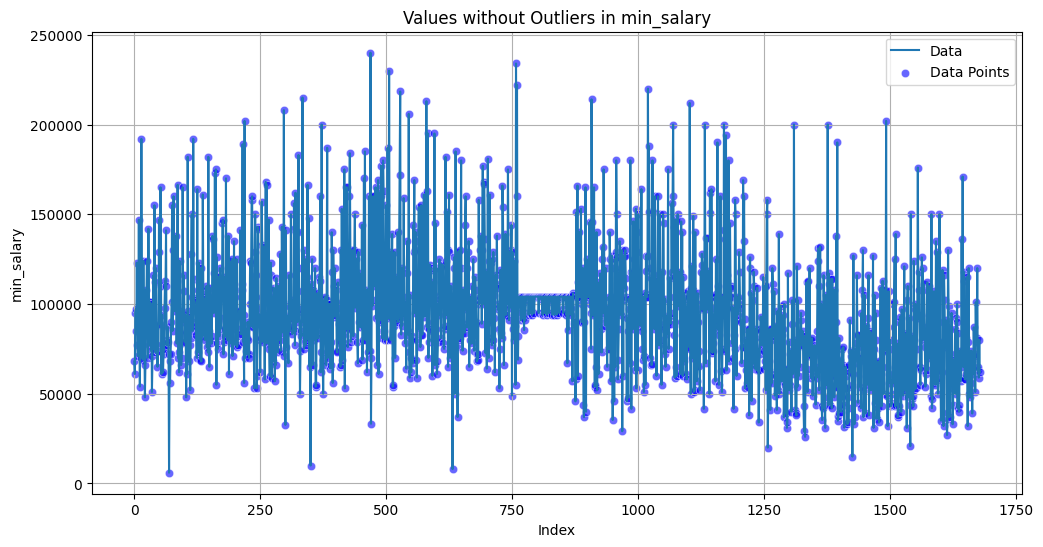

In [1032]:
detect_and_plot_outliers(us, 'min_salary')


In [1033]:

indices = [157, 526, 578, 668, 743, 933, 1205]

us_min_outliers = us.loc[indices]

display(us_min_outliers)


,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
157,Intuitive Machines Llc,3.8,Research Software Engineer,"Houston, TX",Houston,TX,software engineer,junior,295000.0,440000.0,367500.0,NaN,NaN,NaN,NaN,NaN,NaN
526,Boeing,4.0,Senior Software Engineer,"Washington, DC",Washington,DC,software engineer,senior,343000.0,637000.0,490000.0,NaN,NaN,NaN,NaN,NaN,NaN
578,Intel,5.0,"Software Engineer 2 - Mainframe (Cobol, Jcl, V...","Brookfield, WI",Brookfield,WI,software engineer,junior,310000.0,465000.0,387500.0,NaN,NaN,NaN,NaN,NaN,NaN
668,Workday,4.0,Software Engineer - Camera (Technical Leadership),"Redmond, WA",Redmond,WA,software engineer,senior,300000.0,450000.0,375000.0,NaN,NaN,NaN,NaN,NaN,NaN
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",Columbia,MD,software engineer,junior,248000.0,385000.0,316500.0,NaN,NaN,NaN,NaN,NaN,NaN
933,Bridgeline Solutions,3.6,Patent Agent (Machine Learning Ai/Computer Sci...,"Washington, DC",Washington,DC,machine learning engineer,junior,250000.0,250000.0,250000.0,Elite Amlaw firm is looking for a Patent Agent...,No Especifica,No Especifica,[],[],"['Industry experience in Software Development,..."
1205,Selby Jennings,3.1,Nlp Researcher,"New York, NY",New York,NY,nlp researcher,unspecified,250000.0,250000.0,250000.0,We have a current opportunity for an NLP Resea...,Selección de personal y Subcontratación,Recursos humanos,['An ideal candidate will possess the followin...,[],[]


Detected outliers in 'max_salary':
157    440000.0
369    385000.0
372    370000.0
427    385000.0
526    637000.0
578    465000.0
668    450000.0
743    385000.0
759    385000.0
Name: max_salary, dtype: float64
Data before removing outliers: 1680
Data after removing outliers: 1671


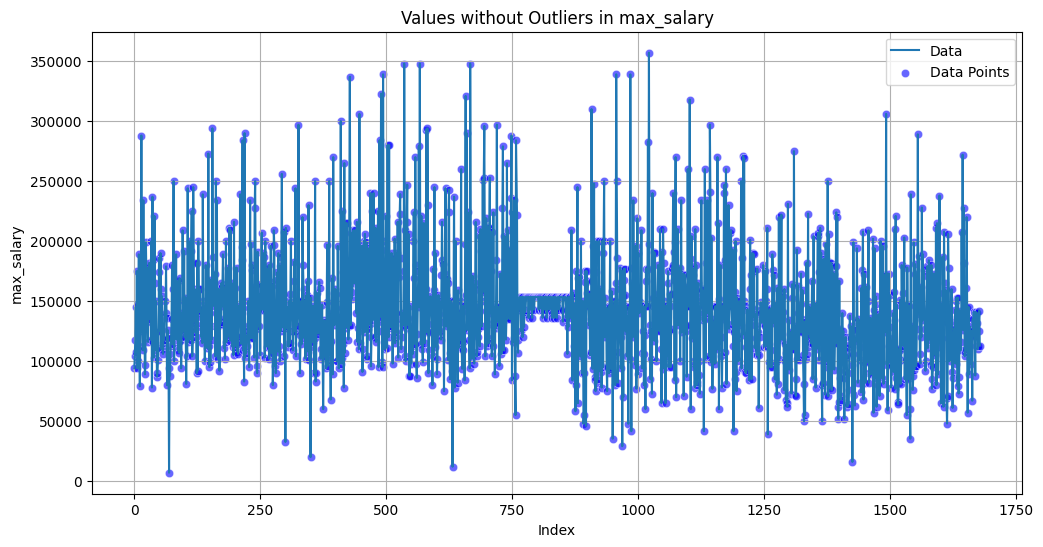

In [1034]:
detect_and_plot_outliers(us, 'max_salary')

In [1035]:
indices = [157, 369, 372, 427, 526, 578, 668, 743, 759]

us_mx_outliers = us.loc[indices]

display(us_mx_outliers)

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
157,Intuitive Machines Llc,3.8,Research Software Engineer,"Houston, TX",Houston,TX,software engineer,junior,295000.0,440000.0,367500.0,NaN,NaN,NaN,NaN,NaN,NaN
369,Snc,2.8,Video Software Engineer,"Lexington, MA",Lexington,MA,software engineer,junior,160000.0,385000.0,272500.0,NaN,NaN,NaN,NaN,NaN,NaN
372,Teamups,4.4,Devops Engineer,"Newtown Square, PA",Newtown Square,PA,devops engineer,junior,200000.0,370000.0,285000.0,NaN,NaN,NaN,NaN,NaN,NaN
427,Qinetiq Us,3.9,Front-End Developer,"Burr Ridge, IL",Burr Ridge,IL,frontend developer,unspecified,160000.0,385000.0,272500.0,NaN,NaN,NaN,NaN,NaN,NaN
526,Boeing,4.0,Senior Software Engineer,"Washington, DC",Washington,DC,software engineer,senior,343000.0,637000.0,490000.0,NaN,NaN,NaN,NaN,NaN,NaN
578,Intel,5.0,"Software Engineer 2 - Mainframe (Cobol, Jcl, V...","Brookfield, WI",Brookfield,WI,software engineer,junior,310000.0,465000.0,387500.0,NaN,NaN,NaN,NaN,NaN,NaN
668,Workday,4.0,Software Engineer - Camera (Technical Leadership),"Redmond, WA",Redmond,WA,software engineer,senior,300000.0,450000.0,375000.0,NaN,NaN,NaN,NaN,NaN,NaN
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",Columbia,MD,software engineer,junior,248000.0,385000.0,316500.0,NaN,NaN,NaN,NaN,NaN,NaN
759,Openai,3.1,Apprentice Etl Software Engineer,"Elkridge, MD",Elkridge,MD,software engineer,junior,160000.0,385000.0,272500.0,NaN,NaN,NaN,NaN,NaN,NaN


Detected outliers in 'avg_salary':
157    367500.0
526    490000.0
578    387500.0
668    375000.0
743    316500.0
Name: avg_salary, dtype: float64
Data before removing outliers: 1680
Data after removing outliers: 1675


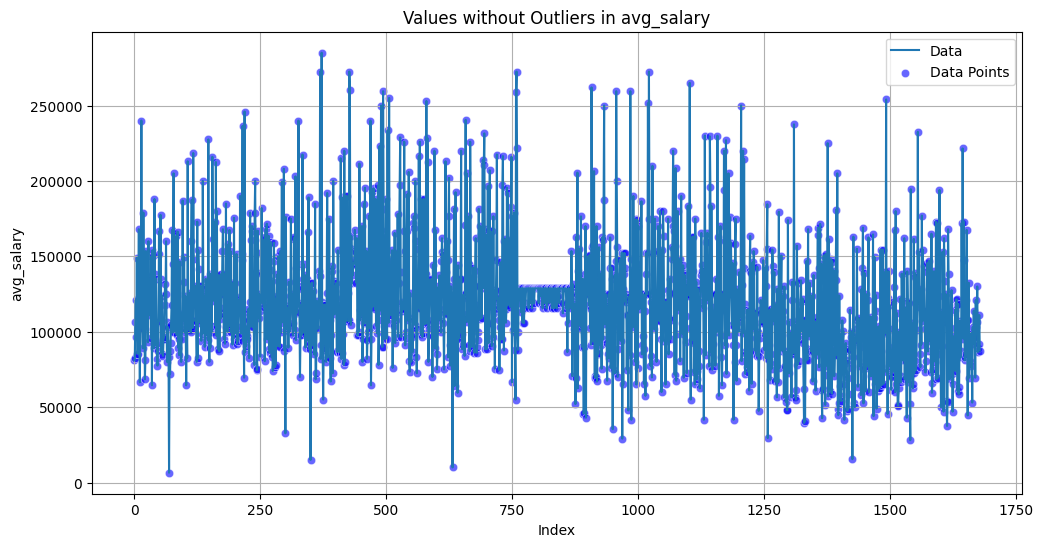

In [1036]:
detect_and_plot_outliers(us, 'avg_salary')

In [1037]:
indices = [157, 526, 578, 668, 743]

us_avg_outliers = us.loc[indices]

display(us_avg_outliers)

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
157,Intuitive Machines Llc,3.8,Research Software Engineer,"Houston, TX",Houston,TX,software engineer,junior,295000.0,440000.0,367500.0,NaN,NaN,NaN,NaN,NaN,NaN
526,Boeing,4.0,Senior Software Engineer,"Washington, DC",Washington,DC,software engineer,senior,343000.0,637000.0,490000.0,NaN,NaN,NaN,NaN,NaN,NaN
578,Intel,5.0,"Software Engineer 2 - Mainframe (Cobol, Jcl, V...","Brookfield, WI",Brookfield,WI,software engineer,junior,310000.0,465000.0,387500.0,NaN,NaN,NaN,NaN,NaN,NaN
668,Workday,4.0,Software Engineer - Camera (Technical Leadership),"Redmond, WA",Redmond,WA,software engineer,senior,300000.0,450000.0,375000.0,NaN,NaN,NaN,NaN,NaN,NaN
743,Teradyne,3.6,Software Engineer (Onsite),"Columbia, MD",Columbia,MD,software engineer,junior,248000.0,385000.0,316500.0,NaN,NaN,NaN,NaN,NaN,NaN


In [1038]:


data = {
    'state_province': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
        'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
        'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
        'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
        'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
        'Wisconsin', 'Wyoming', 'Remote', 'Unspecified',
        'Alberta', 'British Columbia (Columbia Británica)', 'Manitoba',
        'New Brunswick (Nuevo Brunswick)', 'Newfoundland and Labrador (Terranova y Labrador)',
        'Nova Scotia (Nueva Escocia)', 'Ontario', 'Prince Edward Island (Isla del Príncipe Eduardo)',
        'Quebec', 'Saskatchewan', 'Northwest Territories (Territorios del Noroeste)',
        'Nunavut', 'Yukon'
    ],
    'abbreviation': [
        'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
        'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
        'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
        'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
        'WI', 'WY', 'Remote', 'Unspecified', 'AB', 'BC', 'MB', 'NB', 'NL', 'NS',
        'ON', 'PE', 'QC', 'SK', 'NT', 'NU', 'YT'
    ]
        }

# Crear el DataFrame
locations = pd.DataFrame(data)

locations['id'] = locations.index

columns_order = ['id', 'state_province', 'abbreviation']
locations = locations[columns_order]

# Mostrar el DataFrame resultante
print(locations)



    id                                    state_province abbreviation
0    0                                           Alabama           AL
1    1                                            Alaska           AK
2    2                                           Arizona           AZ
3    3                                          Arkansas           AR
4    4                                        California           CA
..  ..                                               ...          ...
60  60                                            Quebec           QC
61  61                                      Saskatchewan           SK
62  62  Northwest Territories (Territorios del Noroeste)           NT
63  63                                           Nunavut           NU
64  64                                             Yukon           YT

[65 rows x 3 columns]


# Canada 

In [1039]:
df1 = pd.read_csv('Dataset_Canada.csv')
df1.head()

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, Llc",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"Business Intelligence Specialist, Ft",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [1040]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      1653 non-null   object 
 1   job_info       1653 non-null   object 
 2   position       1653 non-null   object 
 3   employer       1653 non-null   object 
 4   city           1653 non-null   object 
 5   province       1653 non-null   object 
 6   skill          1653 non-null   object 
 7   seniority      1653 non-null   object 
 8   work_type      1653 non-null   object 
 9   industry_type  1653 non-null   object 
 10  min_salary     1653 non-null   float64
 11  max_salary     1653 non-null   float64
 12  avg_salary     1653 non-null   float64
dtypes: float64(3), object(10)
memory usage: 168.0+ KB


In [1041]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].apply(ftfy.fix_text)

In [1042]:
df1['job_title'].value_counts()

job_title
Senior Supply Chain Data Analysts        245
Senior Business Intelligence Analysts    216
Senior Business Analysts                 192
Business Systems Analysts                182
Systems and Data Analysts                169
Senior Data Analysts                     158
Business and Technical Analysts          146
Business and Marketing Analysts          141
Financial and Operational Analysts       139
Database Analysts                         65
Name: count, dtype: int64

In [1043]:
title_df = df1[df1['job_title'].str.contains(r'[^\x00-\x7F]', na=False)]
title_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [1044]:
position_df = df1[df1['position'].str.contains(r'[^\x00-\x7F]', na=False)]
position_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [1045]:
df1['position'].value_counts()

position
Analyst                 713
Business Analyst        298
Data Analyst            215
System Analyst          175
Data Engineer            39
BI Analyst               33
Risk Analyst             27
Developer                27
Data Specialist          21
Lead                     14
Intern                   14
Logistic Analyst         11
Programmer                9
Manager                   8
Quantitative Analyst      7
Data Consultant           7
Data Associate            6
Financial Analyst         6
Data Officer              5
Coordinator               3
Data Architect            3
Other                     3
Statistician              3
Director                  2
Data Scientist            2
Trainer                   1
Executive                 1
Name: count, dtype: int64

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [1046]:
employer_df = df1[df1['employer'].str.contains(r'[^\x00-\x7F]', na=False)]
employer_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
679,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒâ©Alis,Richmond,BC,"Power Bi, Html, Power Platform, Excel, Css, Ja...",ANY,In-Person,Others,68960.00,94820.0,81890.000
716,Business and Technical Analysts,V.I.E. Programmer Analyst- H/F/X,Programmer,Sociãƒâ©Tãƒâ© Gãƒâ©Nãƒâ©Rale,Montreal,QC,"Git, Docker, Github, Java, Jira, Postgresql",ANY,In-Person,Others,64123.59,86600.0,75361.795
931,Systems and Data Analysts,Engineering Project Data Analyst,Data Engineer,Cmc Ãæ'€°Lectronique,Montreal,QC,"Jira, Power BI, SQL, Primavera, Tableau",ANY,In-Person,Others,69000.00,80000.0,74500.000
1536,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒæ'©Alis,Richmond,BC,"Python, No SQL, Power BI, SQL, Microsoft Outlook",ANY,In-Person,Others,69000.00,95000.0,82000.000
1537,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒæ'©Alis,Richmond,QC,"Python, No SQL, Power BI, SQL, Microsoft Outlook",ANY,In-Person,Others,69000.00,95000.0,82000.000
1538,Business Systems Analysts,Business Systems Analyst,System Analyst,Atkinsrãƒæ'©Alis,Richmond,NB,"Python, No SQL, Power BI, SQL, Microsoft Outlook",ANY,In-Person,Others,69000.00,95000.0,82000.000


**Nota:**
Los errores de esta columna se integraran en un diccionario con los datos de otras columnas para tratarlos simultáneamente.

In [1047]:
city_df = df1[df1['city'].str.contains(r'[^\x00-\x7F]', na=False)]
city_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
1039,Business and Technical Analysts,Analyste De La Chaîne D'Approvisionnement / Su...,Analyst,Altius Spices & Seasonings Inc.,Baie-d'Urfé,QC,"Bilingual, Tableau, Supply chain, ERP systems,...",ANY,In-Person,Others,35000.0,57200.0,46100.0
1050,Business and Technical Analysts,Business Intelligence Lead/Responsable De L'In...,Lead,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, Power BI, JD Edwards, Busi...",ANY,In-Person,Others,52000.0,75000.0,63500.0
1065,Senior Business Intelligence Analysts,Business Intelligence Report Developer/Analyst...,Developer,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, JD Edwards, Business intel...",ANY,In-Person,Others,68000.0,88300.0,78150.0
1097,Business and Technical Analysts,Kãƒæ'¶Rber Business Analyst/Kãƒæ'¶Rber Analyst...,Business Analyst,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, JD Edwards, Customer servi...",ANY,In-Person,Others,52000.0,75000.0,63500.0


In [1048]:
cities = df1['city'].value_counts()
cities.sort_index()

city
100 Mile House     1
Abbotsford         8
Acheson            1
Alberta            2
Amherst            1
                  ..
Windsor            9
Winnipeg          28
Woodbridge         3
Yellowknife        1
York               1
Name: count, Length: 171, dtype: int64

In [1049]:
df1['city'] = df1['city'].replace({
    'Baie-d\'urfe': 'Baie-d\'Urfé',
    'Portage la Prairie': 'Portage La Prairie',
    'Rocky View': 'Rocky View County'
})

**Nota:**
Se reemplazaron las variantes incorrectas o inconsistentes y se dejaron los nombres de las ciudades correctamente estandarizados.

In [1050]:
province_df = df1[df1['province'].str.contains(r'[^\x00-\x7F]', na=False)]
province_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [1051]:
df1['province'].value_counts()

province
ON       878
BC       220
AB       174
QC       168
Undef     96
MB        36
NS        34
NB        21
SK        16
NL         5
YT         2
PE         1
NT         1
NFL        1
Name: count, dtype: int64

In [1052]:
df1['province'] = df1['province'].replace({'Undef': 'Unspecified'})

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [1053]:
skill_df = df1[df1['skill'].str.contains(r'[^\x00-\x7F]', na=False)]
skill_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [1054]:
seniority_df = df1[df1['seniority'].str.contains(r'[^\x00-\x7F]', na=False)]
seniority_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [1055]:
df1['seniority'].value_counts()

seniority
ANY       1262
Senior     330
Mid         35
Junior      26
Name: count, dtype: int64

In [1056]:
df1['seniority'] = df1['seniority'].replace({'ANY': 'Undefined'})

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [1057]:
work_type_df = df1[df1['work_type'].str.contains(r'[^\x00-\x7F]', na=False)]
work_type_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [1058]:
df1['work_type'].value_counts()

work_type
In-Person    1514
Remote        119
Hybrid         20
Name: count, dtype: int64

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [1059]:
industry_type_df = df1[df1['industry_type'].str.contains(r'[^\x00-\x7F]', na=False)]
industry_type_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


In [1060]:
df1['industry_type'].value_counts()

industry_type
Others                859
Technology            322
Healthcare            111
Finance               101
Service                52
Consulting             49
Energy                 22
Automotive             22
Education              18
Construction           15
Government             15
Transportation         11
Media                  10
Telecommunications      8
Legal                   7
Insurance               6
Aerospace               6
Real Estate             5
Manufacturing           5
Travel                  4
Retail                  3
Agriculture             2
Name: count, dtype: int64

**Nota:**
La columna revisada no presenta valores problemáticos ni errores. No se requieren cambios adicionales.

In [1061]:
replacements = {
    'ãƒâ©': 'é',  
    'ãƒÂ©': 'é',  
    'ãƒâ§': 'ç',  
    'ãƒâ¦': 'æ',  
    'ãƒâ¢': 'â',  
    'ãƒâ': 'a',   
    '©': '',      
    '¨Ã': '',     
    'ƒæ': '',     
    '¥': '',      
    'â€™': "'",   
    'â€œ': '"',   
    'â€”': '-',   
    'Â': '',     
    '¢': '',     
    'Ã¯': '',    
    'Ã©': 'é',   
    'Ã§': 'ç',   
    'Ã´': 'ô',   
    'Ã¨': 'è',   
    'ã§': 'ç',   
    'ã¢': 'â',
    'Ã’': 'Ô',       
    'Ã‚¬°': '°',     
    'ã’': 'é',        
    'Ã‚': 'é',        
    'Atkinsrã’Ã‚Alis': 'AtkinsRéalis',  # Ejemplo específico
    'SociéTé GéNéRale': 'Société Générale',  # Ejemplo específico
    'Cmc Ã’Ã‚¬°Lectronique': 'Cmc ÔÉ°Electronique', 
}


def reemplace_characters(text, replacements):
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

# aplicar reemplazos en las columnas problematicas
df1['job_info'] = df1['job_info'].apply(lambda x: reemplace_characters(str(x), replacements))
df1['employer'] = df1['employer'].apply(lambda x: reemplace_characters(str(x), replacements))
df1['city'] = df1['city'].apply(lambda x: reemplace_characters(str(x), replacements))

In [1062]:
info1_df = df1[df1['job_info'].str.contains(r'[^\w\sÀ-ÿ\'&/,\-\(\).;|\[\]@:–]', na=False)] 
info1_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
659,Senior Supply Chain Data Analysts,"Analyste Dã'¬""Tudes / Study Analyst, Real Worl...",Analyst,Iqvia,Kirkland,QC,Excel,Undefined,In-Person,Others,68500.0,87000.0,77750.0
1097,Business and Technical Analysts,Kã'¶Rber Business Analyst/Kã'¶Rber Analyste Éc...,Business Analyst,Exertis | Jam,Baie-d'Urfé,QC,"Bilingual, Tableau, JD Edwards, Customer servi...",Undefined,In-Person,Others,52000.0,75000.0,63500.0
1121,Business and Technical Analysts,'¿Å€ŒçÃ'¨â'¬¹Ã'®Å¾'®­-†€™Ã…€™¦Ã€ŽâÃ'¯¦Ã'Ã'â...,BI Analyst,Savvypro Edu Inc.,Remote,Unspecified,Agile,Undefined,Remote,Others,104000.0,180000.0,142000.0
1137,Business and Technical Analysts,"Business Systems Analyst, Digital / Analyste, ...",System Analyst,Imperial Tobacco Canada,Montreal,QC,"Azure, Writing skills, DevOps, Python, E-commerce",Undefined,In-Person,Others,44000.0,90000.0,67000.0


In [1063]:
info2_df = df1[df1['employer'].str.contains(r'[^\w\sÀ-ÿ\'&/,\-\(\).;|\[\]@:–]', na=False)]
info2_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
180,Senior Data Analysts,Senior Data Analyst,Data Analyst,Scene+,Toronto,ON,"Sql, Python, Tableau, Machine Learning",Senior,In-Person,Others,69000.0,86000.0,77500.0
555,Senior Business Analysts,Operations Analyst,Analyst,Tim Hortons | Company #4020653,London,ON,"Sas, Fabric, Excel",Undefined,In-Person,Others,66000.0,84500.0,75250.0
710,Business Systems Analysts,"P&C Insurance Business Analyst, Implementations",Business Analyst,Cognition+,Remote in London,ON,R,Undefined,Remote,Technology,85816.8,91520.0,88668.4
782,Systems and Data Analysts,Expert Data Warehouse / Data Engineer / Data A...,Data Engineer,Thimm Group Gmbh + Co. Kg,Engineer,BC,Undef,Senior,In-Person,Others,76000.0,89440.0,82720.0
894,Senior Data Analysts,Senior Data Analyst,Data Analyst,Scene+,Toronto,ON,"Tableau, SQL, Presentation skills, Machine lea...",Senior,In-Person,Others,43000.0,93000.0,68000.0
931,Systems and Data Analysts,Engineering Project Data Analyst,Data Engineer,Cmc Ãæ'€°Lectronique,Montreal,QC,"Jira, Power BI, SQL, Primavera, Tableau",Undefined,In-Person,Others,69000.0,80000.0,74500.0
1108,Systems and Data Analysts,Expert Data Warehouse / Data Engineer / Data A...,Data Engineer,Thimm Group Gmbh + Co. Kg,Engineer,Unspecified,Data warehouse,Senior,In-Person,Others,47000.0,70000.0,58500.0
1307,Senior Business Analysts,Operations Analyst,Analyst,Tim Hortons | Company #4020653,London,ON,"SQL, SAS",Undefined,In-Person,Others,47000.0,60000.0,53500.0
1577,Business Systems Analysts,"P&C Insurance Business Analyst, Implementations",Business Analyst,Cognition+,London,ON,"System administration, Sales, Customer service...",Undefined,In-Person,Technology,86000.0,88000.0,87000.0


In [1064]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df1['employer'] = df1['employer'].apply(remove_numbers)

# reemplazar caracteres
df1['employer'] = df1['employer'].str.replace(r'[+\|#]', '', regex=True)


In [1065]:
info3_df = df1[df1['city'].str.contains(r'[^\w\sÀ-ÿ\'&/,\-\(\).;|\[\]@:–]', na=False)]
info3_df

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary


# Merge

In [1066]:
us.sample(5)

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements
196,Realmone,3.8,Software Engineer,United States,Unspecified,Remote,software engineer,junior,95000.0,152000.0,123500.0,NaN,NaN,NaN,NaN,NaN,NaN
1332,Full Potential Solutions,3.8,Data Analytics Manager,"Kansas City, MO",Kansas City,MO,data analyst,junior,26000.0,55000.0,40500.0,About You: We are looking for a dedicated and...,Staffing & Outsourcing,Business Services,"['Creative problem-solving skills, strong quan...",[],['Dive deep into technical requirements with e...
93,Parabola,3.8,"Software Engineer, Full Stack",United States,Unspecified,Remote,software engineer,junior,66000.0,94000.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN
96,Sagitec,3.9,Software Engineer,"Saint Paul, MN",Saint Paul,MN,software engineer,junior,165000.0,209000.0,187000.0,NaN,NaN,NaN,NaN,NaN,NaN
1229,Blueprint Medicines,3.9,"Scientist I/Ii, Biology","Cambridge, MA",Cambridge,MA,"scientist i/ii, biology",junior,67000.0,137000.0,102000.0,"Scientist I/II, Biology Cambridge, MA BI...",Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,['Qualifications and capabilities: PhD in cel...,[],['[Objective of position] Responsibilities:...


In [1067]:
df1.sample(5)

,job_title,job_info,position,employer,city,province,skill,seniority,work_type,industry_type,min_salary,max_salary,avg_salary
1545,Database Analysts,Database Analyst,Analyst,Goldenhome Cabinetry Eastern Canada Inc.,Aurora,ON,"R, SQL, Python, SQL, JavaScript",Undefined,In-Person,Others,88920.0,95160.0,92040.0
1071,Senior Data Analysts,Digital Data Analyst,Data Analyst,Trillium Health Partners,Mississauga,ON,"Python, No SQL, CRM software, Power BI, SQL",Undefined,In-Person,Healthcare,82000.0,88000.0,85000.0
191,Business Systems Analysts,"Analyst, Business Systems",System Analyst,Northwestel Inc.,Whitehorse,YT,"Html, Php, Perl, Powershell, Css, Python, Java...",Undefined,In-Person,Others,85816.8,91520.0,88668.4
970,Systems and Data Analysts,Data Analyst - Informatics And Systems,System Analyst,Sulymon Global Inc.,North York,ON,"Oracle, Python, SQL, Computer skills, Python",Undefined,In-Person,Others,90480.0,90480.0,90480.0
494,Senior Supply Chain Data Analysts,Logistic & Distribution Analyst,Logistic Analyst,Ccm Hockey,Saint-Jean-sur-Richelieu,QC,Undef,Undefined,In-Person,Others,68500.0,87000.0,77750.0


In [1068]:

rename_dict = {
    'employer': 'company',
    'province': 'state',
    'industry_type' : 'industry',
    
}


df1_renamed = df1.rename(columns=rename_dict)

# Mostrar los nombres de columnas de df2 después de renombrar
print(df1_renamed.columns)


Index(['job_title', 'job_info', 'position', 'company', 'city', 'state',
       'skill', 'seniority', 'work_type', 'industry', 'min_salary',
       'max_salary', 'avg_salary'],
      dtype='object')


In [1069]:

job_postings = pd.concat([us, df1_renamed], ignore_index=True, sort=False)


print(job_postings.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           3333 non-null   object 
 1   company_score     1680 non-null   float64
 2   job_title         3333 non-null   object 
 3   location          1680 non-null   object 
 4   city              3333 non-null   object 
 5   state             3333 non-null   object 
 6   position          3333 non-null   object 
 7   seniority         3333 non-null   object 
 8   min_salary        3333 non-null   float64
 9   max_salary        3333 non-null   float64
 10  avg_salary        3333 non-null   float64
 11  job_info          2463 non-null   object 
 12  industry          2463 non-null   object 
 13  sector            810 non-null    object 
 14  skills            810 non-null    object 
 15  responsibilities  810 non-null    object 
 16  requirements      810 non-null    object 


In [1070]:
job_postings['company_score'] = job_postings['company_score'].fillna('Unspecified')

In [1071]:
job_postings['company_score'].isna().sum()

0

In [1072]:
job_postings['job_info'] = job_postings['job_info'].fillna('Unspecified')

In [1073]:
job_postings['industry'] = job_postings['industry'].fillna('Unspecified')

In [1074]:
job_postings['industry'] = job_postings['industry'].replace('No Especifica', 'Unspecified')

In [1075]:
job_postings['sector'] = job_postings['sector'].fillna('Unspecified')

In [1076]:
job_postings['sector'] = job_postings['sector'].replace('No Especifica', 'Unspecified')

In [1077]:
job_postings['work_type'] = job_postings['work_type'].fillna('Unspecified')

In [1078]:
job_postings['location'] = job_postings['location'].fillna('Unspecified')

In [1079]:
display(job_postings.sample(5))

,company,company_score,job_title,location,city,state,position,seniority,min_salary,max_salary,avg_salary,job_info,industry,sector,skills,responsibilities,requirements,skill,work_type
3059,Scotiabank,Unspecified,Senior Supply Chain Data Analysts,Unspecified,Toronto,ON,Analyst,Undefined,62000.0,84000.0,73000.0,"Business And Quality Assurance Analyst, Scotia...",Finance,Unspecified,NaN,NaN,NaN,"Agile, Business requirements, No SQL",In-Person
1110,Procter & Gamble,4.1,"Director, Platform Engineering","Cincinnati, OH",Cincinnati,OH,"director, platform engineering",junior,149000.0,177000.0,163000.0,Job Location Cincinnati Job Description ...,Fabricación de productos de consumo,Manufactura,['Strong working Knowledge on Google cloud cap...,[],"[""Job Qualifications Required Bachelor's...",NaN,Unspecified
1319,Autodesk,4.0,Data Engineer,"San Francisco, CA",San Francisco,CA,data engineer,junior,76000.0,140000.0,108000.0,"Location: San Francisco, CA- United States Jo...",Computer Hardware & Software,Information Technology,['The ideal candidate will be responsible for ...,[],"['Location: San Francisco, CA- United States ...",NaN,Unspecified
2354,IqI Canada Inc,Unspecified,Business and Marketing Analysts,Unspecified,Ancaster,ON,Analyst,Undefined,89440.0,91520.0,90480.0,Market Research Analyst,Others,Unspecified,NaN,NaN,NaN,Undef,In-Person
647,Independent Software,4.2,Software Quality Assurance Engineer & Tester,"Atlanta, GA",Atlanta,GA,software quality assurance engineer & tester,junior,81000.0,118000.0,99500.0,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,Unspecified


In [1080]:
job_postings['seniority'] = job_postings['seniority'].replace('senior', 'Senior')

job_postings['seniority'] = job_postings['seniority'].replace('Undefined', 'unspecified')

job_postings['seniority'] = job_postings['seniority'].replace('junior', 'Junior')

job_postings['seniority'] = job_postings['seniority'].replace('unspecified', 'Unspecified')

In [1081]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           3333 non-null   object 
 1   company_score     3333 non-null   object 
 2   job_title         3333 non-null   object 
 3   location          3333 non-null   object 
 4   city              3333 non-null   object 
 5   state             3333 non-null   object 
 6   position          3333 non-null   object 
 7   seniority         3333 non-null   object 
 8   min_salary        3333 non-null   float64
 9   max_salary        3333 non-null   float64
 10  avg_salary        3333 non-null   float64
 11  job_info          3333 non-null   object 
 12  industry          3333 non-null   object 
 13  sector            3333 non-null   object 
 14  skills            810 non-null    object 
 15  responsibilities  810 non-null    object 
 16  requirements      810 non-null    object 


In [1082]:


# Crear un ID para cada fila en el dataset principal
job_postings['id'] = job_postings.index + 1

# 1. Tabla industry_type
industry_type = job_postings[['industry']].drop_duplicates().reset_index(drop=True)
industry_type['id'] = industry_type.index + 1
industry_type.rename(columns={'industry': 'type'}, inplace=True)

# 2. Tabla position_types
position_types = job_postings[['position']].drop_duplicates().reset_index(drop=True)
position_types['id'] = position_types.index + 1

# 3. Tabla seniority_levels
seniority_levels = job_postings[['seniority']].drop_duplicates().reset_index(drop=True)
seniority_levels['id'] = seniority_levels.index + 1
seniority_levels.rename(columns={'seniority': 'level'}, inplace=True)

# 4. Tabla locations, usando tu dataset de estados y provincias
locations = pd.DataFrame({
    'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
              'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
              'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
              'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
              'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
              'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
              'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
              'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
              'Wisconsin', 'Wyoming', 'Remote', 'Unspecified', 
              'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 
              'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 
              'Quebec', 'Saskatchewan', 'Northwest Territories', 'Nunavut', 'Yukon'],
    'abbreviation': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 
                     'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 
                     'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
                     'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 
                     'WI', 'WY', 'Remote', 'Unspecified', 'AB', 'BC', 'MB', 'NB', 'NL', 'NS', 
                     'ON', 'PE', 'QC', 'SK', 'NT', 'NU', 'YT'],
                     })
locations['id'] = locations.index + 1

# Mostrar las tablas generadas
 # Muestra los primeros valores únicos de industry
 # Muestra los primeros valores únicos de position
 # Muestra los primeros valores únicos de seniority
 # Muestra los primeros valores de la tabla locations


In [1101]:
display(industry_type) 

,type,id
0,Unspecified,1
1,Aseguradoras y sociedades de inversión,2
2,Banca y Servicios de crédito,3
3,Desarrollo de software,4
4,Fabricación de productos químicos,5
...,...,...
128,Manufacturing,129
129,Telecommunications,130
130,Retail,131
131,Agriculture,132


In [1102]:
display(position_types) 

,position,id
0,software engineer,1
1,software support engineer,2
2,backend developer,3
3,software developers,4
4,java engineer,5
...,...,...
344,Executive,345
345,Other,346
346,Financial Analyst,347
347,Statistician,348


In [1103]:
display(seniority_levels)

,level,id
0,Junior,1
1,Unspecified,2
2,Senior,3
3,Mid,4


In [1086]:

locations['country'] = locations['id'].apply(lambda x: 'USA' if x <= 50 else ('Remote' if x == 51 else ('Unspecified' if x == 52 else 'Canada')))




In [1087]:
display(locations.tail(20)) 

,state,abbreviation,id,country
45,Virginia,VA,46,USA
46,Washington,WA,47,USA
47,West Virginia,WV,48,USA
48,Wisconsin,WI,49,USA
49,Wyoming,WY,50,USA
50,Remote,Remote,51,Remote
51,Unspecified,Unspecified,52,Unspecified
52,Alberta,AB,53,Canada
53,British Columbia,BC,54,Canada
54,Manitoba,MB,55,Canada


In [1088]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         65 non-null     object
 1   abbreviation  65 non-null     object
 2   id            65 non-null     int64 
 3   country       65 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


# Valores atipicos 

Detected outliers in 'min_salary':


157     295000.0
334     215000.0
469     240000.0
506     230000.0
526     343000.0
528     218400.0
578     310000.0
580     213000.0
668     300000.0
743     248000.0
758     234000.0
760     222000.0
908     214000.0
933     250000.0
1020    220000.0
1103    212000.0
1205    250000.0
Name: min_salary, dtype: float64
Data before removing outliers: 3333
Data after removing outliers: 3316


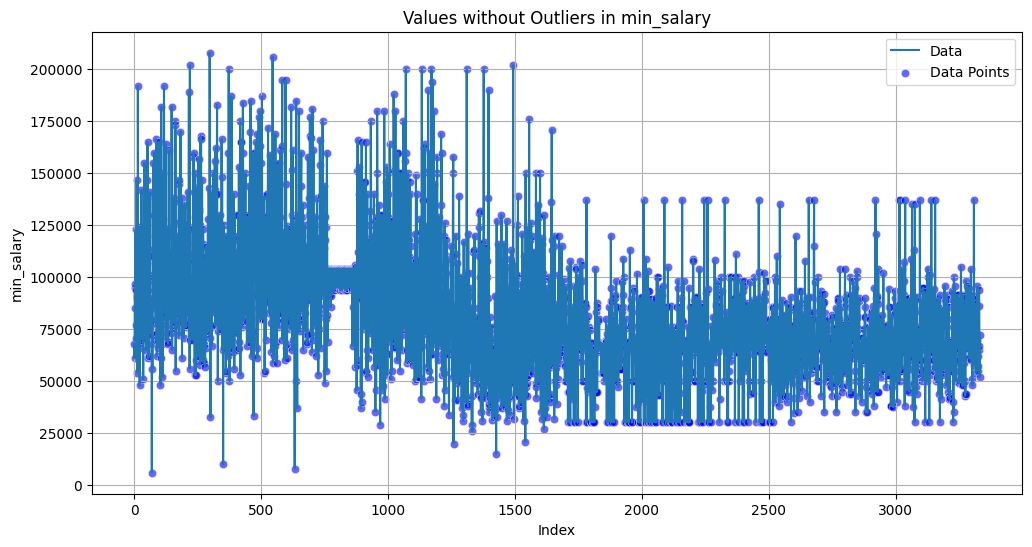

In [1089]:
detect_and_plot_outliers(job_postings, 'min_salary')

Detected outliers in 'max_salary':
157     440000.0
369     385000.0
372     370000.0
427     385000.0
428     337000.0
490     323000.0
494     339000.0
526     637000.0
536     348000.0
567     348000.0
578     465000.0
658     321000.0
667     348000.0
668     450000.0
743     385000.0
759     385000.0
957     339000.0
985     339000.0
1022    357000.0
1103    318000.0
Name: max_salary, dtype: float64
Data before removing outliers: 3333
Data after removing outliers: 3313


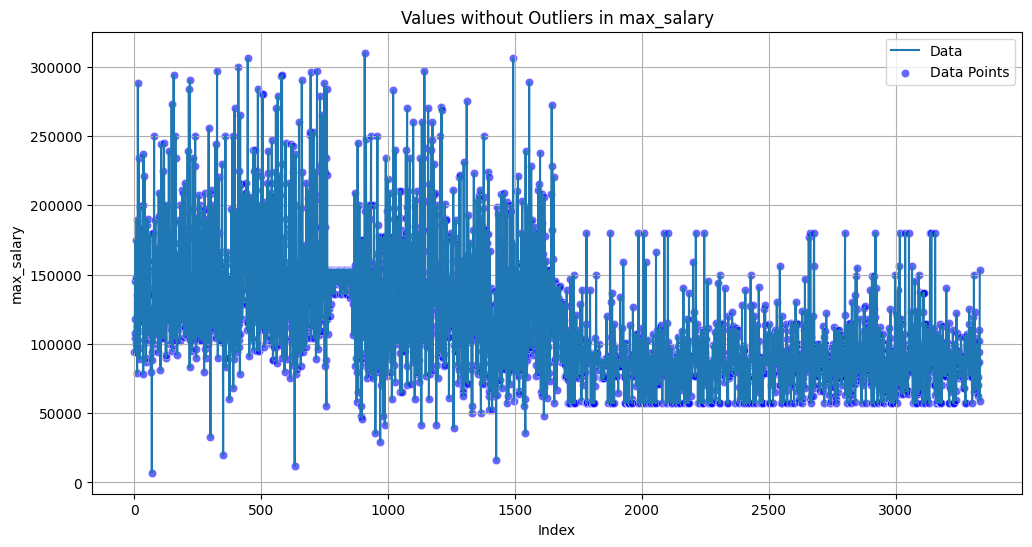

In [1090]:
detect_and_plot_outliers(job_postings, 'max_salary')

Detected outliers in 'avg_salary':
157     367500.0
369     272500.0
372     285000.0
427     272500.0
428     260500.0
494     259500.0
526     490000.0
578     387500.0
668     375000.0
743     316500.0
758     259000.0
759     272500.0
908     262000.0
957     259500.0
985     259500.0
1022    272500.0
1103    265000.0
Name: avg_salary, dtype: float64
Data before removing outliers: 3333
Data after removing outliers: 3316


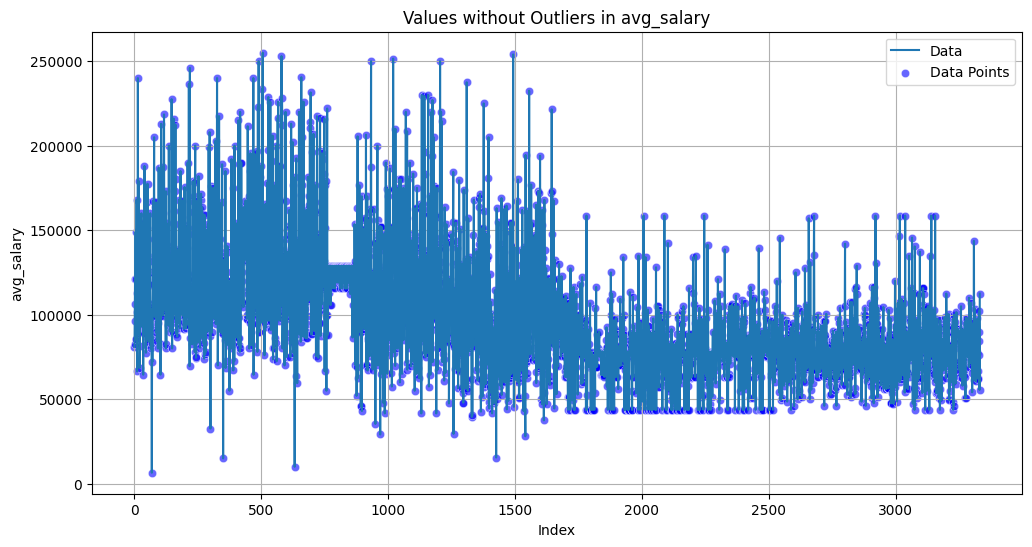

In [1091]:
detect_and_plot_outliers(job_postings, 'avg_salary')

# Costo de vida USA


In [1092]:
#costo de vida 
df2 = pd.read_csv('Dataset_cost_of_living_US.csv')
df2.head()

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [1093]:
df2[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income']] = df2[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income']].round(2)

In [1094]:
df2.head()

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.73,3454.92,10829.17,5737.48,4333.81,0.00,6392.95,39254.05,73010.41
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50,5091.71,11588.19,8659.56,6217.46,6147.83,7422.08,57194.33,73010.41
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50,7460.20,12361.78,11581.63,7075.66,15824.69,9769.56,76141.03,73010.41
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15,9952.24,13452.19,14503.71,9134.36,18802.19,13101.70,94203.53,73010.41
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15,12182.21,13744.60,17425.79,9942.36,18802.19,13469.22,100823.52,73010.41


In [1095]:
df2['area_name'].value_counts()

area_name
Atlanta-Sandy Springs-Roswell, GA HUD Metro FMR Area             240
Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area     200
Richmond, VA MSA                                                 170
Virginia Beach-Norfolk-Newport News, VA-NC HUD Metro FMR Area    150
St. Louis, MO-IL HUD Metro FMR Area                              130
                                                                ... 
Monroe County, KY                                                 10
Montgomery County, KY                                             10
Morgan County, KY                                                 10
Muhlenberg County, KY                                             10
Weston County, WY                                                 10
Name: count, Length: 2561, dtype: int64

In [1096]:
df2['area_name'] = df2['area_name'].str.split(',').str[0]

In [1097]:
df2['family_member_count'].value_counts()

family_member_count
1p0c    3142
1p1c    3142
1p2c    3142
1p3c    3142
1p4c    3142
2p0c    3142
2p1c    3142
2p2c    3142
2p3c    3142
2p4c    3142
Name: count, dtype: int64

In [1098]:
df2[['parents', 'children']] = df2['family_member_count'].str.extract(r'(\d)p(\d)c')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null

In [1099]:
df2 = df2.astype({
    'parents':'int64',
    'children':'int64'
})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null

In [1100]:
df2 = df2.round(2)
df2.head()

,case_id,state,is_metro,area_name,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,parents,children
0,1,AL,True,Montgomery,Autauga County,1p0c,8505.73,3454.92,10829.17,5737.48,4333.81,0.00,6392.95,39254.05,73010.41,1,0
1,1,AL,True,Montgomery,Autauga County,1p1c,12067.50,5091.71,11588.19,8659.56,6217.46,6147.83,7422.08,57194.33,73010.41,1,1
2,1,AL,True,Montgomery,Autauga County,1p2c,12067.50,7460.20,12361.78,11581.63,7075.66,15824.69,9769.56,76141.03,73010.41,1,2
3,1,AL,True,Montgomery,Autauga County,1p3c,15257.15,9952.24,13452.19,14503.71,9134.36,18802.19,13101.70,94203.53,73010.41,1,3
4,1,AL,True,Montgomery,Autauga County,1p4c,15257.15,12182.21,13744.60,17425.79,9942.36,18802.19,13469.22,100823.52,73010.41,1,4
